# Prerequisites

# class_sz

In [6]:
import classy_sz
classy_sz.__file__

'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

## cosmopower

To install cosmopower, visit:

https://github.com/alessiospuriomancini/cosmopower


Check cosmopower is installed:

In [7]:
import cosmopower

## cobaya

To install cobaya, visit: 

https://cobaya.readthedocs.io/en/latest/installation.html

Check cobaya is installed:

In [8]:
import cobaya

## getdist

To install getdist, visit:

https://getdist.readthedocs.io/en/latest/intro.html

Check getdist is installed


In [9]:
import getdist

## cosmopower emulators

Make a cosmopower-organtization repository to store the emulaotors. It can be wherever on your system: <br>

$ mkdir cosmopower-organtization <br>

Then clone the emulators inside it: <br>

$ cd cosmopower-organtization <br>

$ git clone https://github.com/cosmopower-organization/lcdm.git <br>

Now we need to set the path to this repository. <br>
Mine is just one level above where we are now, so: (adapt to your needs!)

In [10]:
import os
root_path = os.path.abspath("")
path_to_cosmopower_organization = root_path + '/../../cosmopower-organization/' 

Finally, the path to the emulators is:

In [11]:
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'

Check that these paths are correctly set:

In [12]:
import subprocess
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'
str_cmd_subprocess = ["ls",path_to_emulators]
print('inside lcdm:')
print(subprocess.call(str_cmd_subprocess))



inside lcdm:
PK
PP
README.md
TTTEEE
derived-parameters
growth-and-distances
0


# Initialize

In [13]:
import numpy as np
import scipy
import yaml


from getdist import loadMCSamples, MCSamples
from getdist import plots

from cosmopower import cosmopower_NN
from cosmopower import cosmopower_PCAplusNN


import soliket
import cobaya


#
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

We will save chains in the chain directory insied the repository where this notebook is

In [14]:
path_to_chains_dir = root_path + '/chains/'

print(path_to_chains_dir)

/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization/notebooks/chains/


Path to the cobaya packages, see the cobaya documentation.

In [15]:
path_to_cobaya_packages_data = '/Users/boris/Work/CLASS-SZ/SO-SZ/cobaya_packages/data'

Load the emulators:

In [16]:
%%time
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'


cp_der_nn = cosmopower_NN(restore=True,
                      restore_filename=path_to_emulators + 'derived-parameters/DER_v1',
                      )


CPU times: user 24.2 ms, sys: 18.7 ms, total: 42.9 ms
Wall time: 40.8 ms


# Lensing + SDSS $f\sigma_8$ - LCDM

## Set-up of the input file

We need to load the template and add the correct paths to the data files and where we save the chains:

In [23]:
Dict_yaml = yaml.safe_load(open('mcmc_input_files/planck_lensing_and_sdssfs8-classy_sz.yaml'))
print(Dict_yaml)

{'output': 'planck_lensing_and_sdssfs8', 'likelihood': {'planck_2018_lensing.CMBMarged': {'path': '/path/to/cobaya_packages/data/planck_supp_data_and_covmats'}, 'bao.sdss_dr12_consensus_full_shape': {'path': '/path/to/cobaya_packages/data/'}}, 'theory': None, 'params': {'omega_b': {'prior': {'min': 0.01933, 'max': 0.02533}, 'ref': {'dist': 'norm', 'loc': 0.022211104, 'scale': 0.00088253849}, 'proposal': 0.00088253849, 'latex': 'omega_b'}, 'omega_cdm': {'prior': {'min': 0.08, 'max': 0.2}, 'ref': {'dist': 'norm', 'loc': 0.12590565, 'scale': 0.012255042}, 'proposal': 0.012255042, 'latex': 'omega_cdm'}, 'H0': {'prior': {'min': 40.0, 'max': 99.0}, 'ref': {'dist': 'norm', 'loc': 69.351243, 'scale': 17.146899}, 'proposal': 17.146899, 'latex': 'H0'}, 'n_s': {'prior': {'min': 0.8812, 'max': 1.0492}, 'ref': {'dist': 'norm', 'loc': 0.95989286, 'scale': 0.019465327}, 'proposal': 0.019465327, 'latex': 'n_s'}, 'logA': {'prior': {'min': 2.5, 'max': 3.5}, 'ref': {'dist': 'norm', 'loc': 2.9939341, 'sca

In [38]:
Dict_yaml['output'] = path_to_chains_dir +'planck_lensing_and_sdssfs8'
Dict_yaml['sampler']['mcmc']['covmat'] = path_to_chains_dir + '../covmats/planck_lensing_and_sdssfs8.covmat'
Dict_yaml['sampler']['mcmc']['Rminus1_stop'] = 0.1
Dict_yaml['likelihood']['planck_2018_lensing.CMBMarged']['path'] = path_to_cobaya_packages_data + '/planck_supp_data_and_covmats'
Dict_yaml['likelihood']['bao.sdss_dr12_consensus_full_shape']['path'] = path_to_cobaya_packages_data 


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1

Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['lensing_lkl'] = 'Planck'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl,lCl,pCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['ndim_redshifts'] = 4 # doesnt matter if you dont need pk
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pk'] = 1 # for this run we dont need pk's

with open('mcmc_input_files/planck_lensing_and_sdssfs8_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

## Run the chains

In [40]:
%%time
str_cmd_subprocess = ["mpirun",
                      "-np","4",
                      "cobaya-run",
                      "mcmc_input_files/planck_lensing_and_sdssfs8_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

# Plot with getdist

## Analyse

In [28]:
%%time
path_to_chains = []
final_chain_dir_list = []


final_chain_dir_list.append(path_to_chains_dir +'planck_lensing_and_sdssfs8')
path_to_chains.append(path_to_chains_dir)

current_path = os.path.abspath("")

for i in range(len(final_chain_dir_list)):
    os.chdir(path_to_chains[i])
    print('running getdist on chains ' + final_chain_dir_list[i])
    str_cmd_subprocess = ["nice","-n","19",'getdist',final_chain_dir_list[i],"--ignore_rows","0.2"]
    subprocess.call(str_cmd_subprocess)
os.chdir(current_path)

all_samples = []

i=0
readsamps = loadMCSamples(final_chain_dir_list[i],settings={'ignore_rows':0.3})
p = readsamps.getParams()
print('adding derived parameters')
params_cp = {}
params_cp['omega_b'] = p.omega_b
params_cp['omega_cdm'] = p.omega_cdm
params_cp['ln10^{10}A_s'] = p.logA
params_cp['n_s'] = p.n_s
params_cp['tau_reio'] = np.repeat(0.055,len(p.logA))
params_cp['H0'] = p.H0
predicted_der_params = cp_der_nn.ten_to_predictions_np(params_cp)
readsamps.addDerived(predicted_der_params[:,1],name='sigma8',label=r'\sigma_8')
readsamps.addDerived(predicted_der_params[:,0],name='theta_s_1e2',label=r'100*\theta_s')
p = readsamps.getParams()
readsamps.addDerived((p.H0/100.)**-2.*(p.omega_b+p.omega_cdm),name='Ombc',label=r'\Omega_m')

p = readsamps.getParams()
readsamps.addDerived(p.sigma8*(p.Ombc/0.3)**0.5,name='S8d5',label=r'S_8')
Fs = readsamps.getInlineLatex('S8d5',limit=1)
print('S8d5: ',Fs)

samples = readsamps
samples.updateBaseStatistics()
all_samples.append(samples)

running getdist on chains /Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization/notebooks/chains/planck_lensing_and_sdssfs8


producing files in directory  ./
Removed 0.2 as burn in
using 2491 rows, 13 parameters; mean weight 3.630670413488559, tot weight 9044.0
Approx indep samples (N/corr length): 129
Equiv number of single samples (sum w)/max(w): 126
Effective number of weighted samples (sum w)^2/sum(w^2): 784
Best fit sample -log(Like) = -7.036736
Ln(mean 1/like) = -3.411814
mean(-Ln(like)) = -4.766547
-Ln(mean like)  = -5.326965


producing files in directory  ./
/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization/notebooks/chains/planck_lensing_and_sdssfs8.2.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization/notebooks/chains/planck_lensing_and_sdssfs8.3.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization/notebooks/chains/planck_lensing_and_sdssfs8.1.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization/notebooks/chains/planck_lensing_and_sdssfs8.4.txt
Removed 0.2 as burn in
Number of chains used =  4
 var(mean)/mean(var), remaining chains, worst e-value: R-1 =       0.06732
RL: Not enough samples to estimate convergence stats
using 2491 rows, 13 parameters; mean weight 3.630670413488559, tot weight 9044.0
Approx indep samples (N/corr length): 129
Equiv number of single samples (sum w)/max(w): 126
Effective number of weighted samples (sum w)^2/sum(w^2): 784
Best fit sample -log(Like) = -7.036736
Ln(mean 1/like) = -3.411814
mean(-Ln(like)) = -4.766547
-Ln(mean like)  = -5.326965
add

S8d5:  S_8 = 0.803\pm 0.031
CPU times: user 316 ms, sys: 48.4 ms, total: 364 ms
Wall time: 1.1 s


## Plot contours

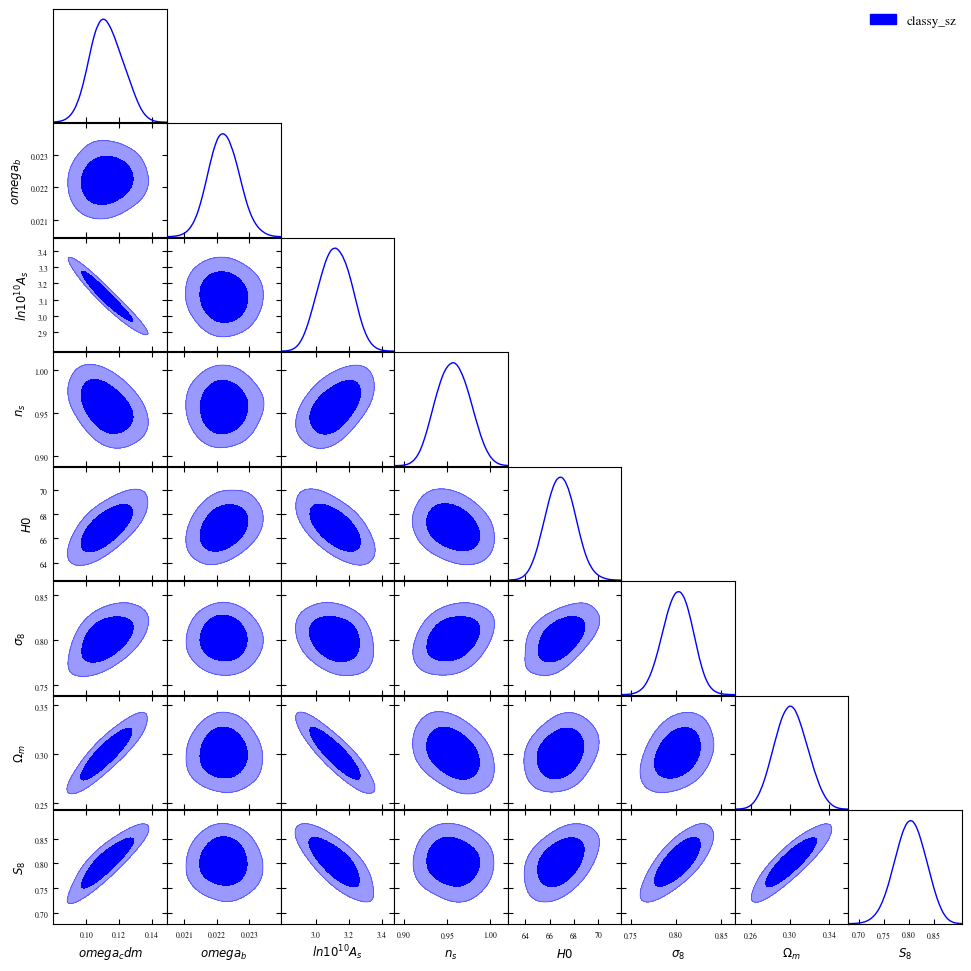

In [29]:
g = plots.getSubplotPlotter()
g.settings.fig_width_inch = 10

g.settings.axes_fontsize = 10
g.settings.lab_fontsize =13

g.settings.legend_fontsize = 14
g.settings.alpha_filled_add=0.1
g.settings.colorbar_label_pad = 20.
g.settings.figure_legend_frame = False

g.settings.title_limit=0 #uncomment if you want to display marg stats.

sample_list = []
for s in range(len(all_samples)):

    sample_list.append(all_samples[s])
    
g.triangle_plot(sample_list,
    [
    'omega_cdm',
    'omega_b',
    'logA',
    'n_s',
    'H0',
    'sigma8',
    'Ombc',
    'S8d5',
    ],

    filled=[True,False],
    legend_labels=[ 'classy_sz'],
    legend_loc='upper right',
    colors = ['blue','red','green','red'],
    line_args=[{'lw':'1','color':'blue'},{'lw':'1','color':'red'},{'lw':'1','color':'green'},{'lw':'1','color':'r'}]
                   )


g.export(path_to_chains_dir +'planck_lensing_and_sdssfs8_contours_classy_sz.pdf')